In [ ]:
#50 marks 
!python --version


Python 3.6.0


In [ ]:
pip install GPyOpt


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from GPyOpt.methods import BayesianOptimization

# Function to display color and take feedback
def user_feedback(rgb):
    color = np.array(rgb[0], dtype=int)  # Convert to integer
    plt.imshow([[color / 255]])  # Display color
    plt.axis("off")
    plt.show()
    grade = int(input(f"How much do you like this color? (0-5): "))
    return -grade  # Negative because GPyOpt minimizes by default


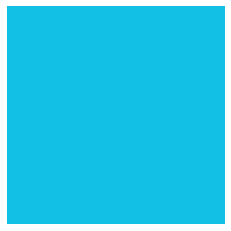

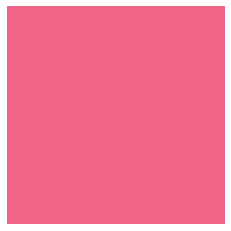

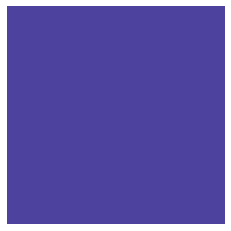

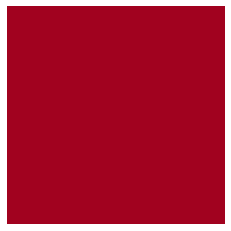

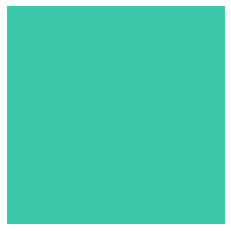

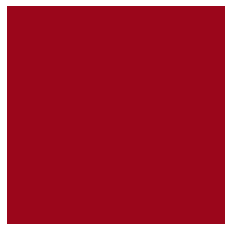

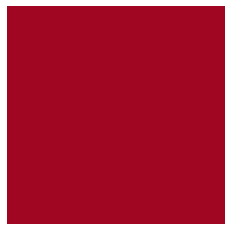

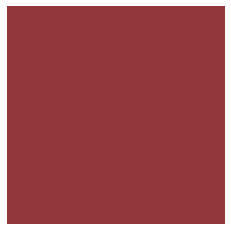

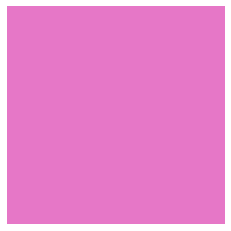

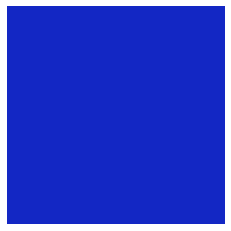

Optimal RGB Color (based on user preference): [ 18.36513356 191.05102959 229.45814638]


In [21]:
# Define the RGB bounds (0-255 for each channel)
bounds = [{'name': 'R', 'type': 'continuous', 'domain': (0, 255)},
          {'name': 'G', 'type': 'continuous', 'domain': (0, 255)},
          {'name': 'B', 'type': 'continuous', 'domain': (0, 255)}]

# Bayesian Optimization loop
bo = BayesianOptimization(
    f=user_feedback,         # Objective function (user grading)
    domain=bounds,           # RGB bounds
    acquisition_type='EI',   # We can use different types of acqusitions such as LCB(Upper bound), EI Expected improvement, Prob of improvement
    maximize=True            # Flip minimization to maximization
)

bo.run_optimization(max_iter=5)  # Run for 10 iterations

print("Optimal RGB Color (based on user preference):", bo.x_opt)


In [25]:
def random_sampling(iterations):
    scores = []
    for _ in range(iterations):
        random_color = np.random.randint(0, 256, 3)  # Random RGB color
        print("Randomly sampled color:")
        score = user_feedback([random_color])
        scores.append(score)
    return scores


Randomly sampled color:


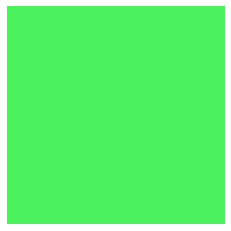

Randomly sampled color:


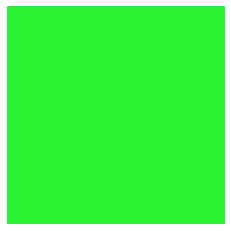

Randomly sampled color:


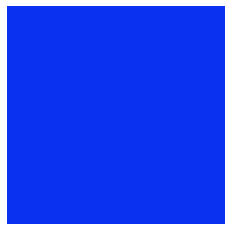

Randomly sampled color:


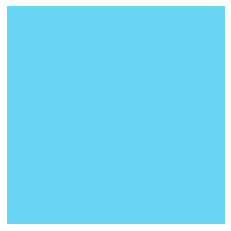

Randomly sampled color:


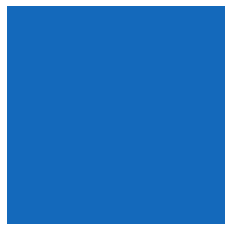

Randomly sampled color:


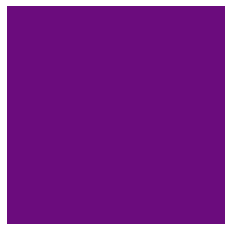

Randomly sampled color:


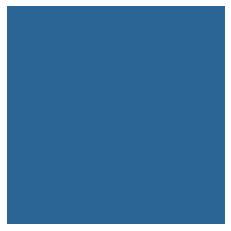

Randomly sampled color:


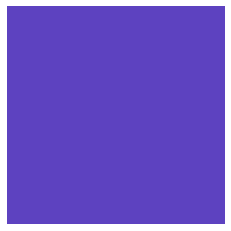

Randomly sampled color:


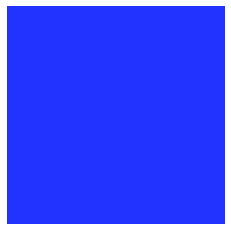

Randomly sampled color:


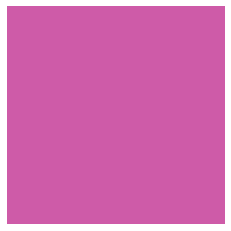

Bayesian Optimization Best Color: [ 18.36513356 191.05102959 229.45814638]
Random Sampling Best Score: 0


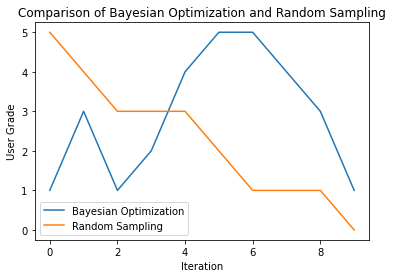

In [28]:
# Run random sampling
random_scores = random_sampling(10)

# Compare scores
print("Bayesian Optimization Best Color:", bo.x_opt)
print("Random Sampling Best Score:", -max(random_scores))

# Visualization
plt.plot(np.array(bo.Y), label="Bayesian Optimization")  # Negative because grades were negated
plt.plot(-np.sort(random_scores), label="Random Sampling")
plt.xlabel("Iteration")
plt.ylabel("User Grade")
plt.legend()
plt.title("Comparison of Bayesian Optimization and Random Sampling")
plt.show()


In [ ]:
# 1. Human Fatigue
# Problem: Users may become fatigued after multiple iterations, leading to inconsistent or rushed feedback, particularly if the number of iterations is high or if the system asks for too many grades.
# Solution: Limit the number of iterations or reduce the complexity of interactions.
# Use a well-designed user interface that minimizes cognitive load (e.g., showing fewer options per iteration or using sliders instead of manual input).


# 2. Subjectivity and Inconsistent Preferences
# Problem: User preferences may be inconsistent or influenced by external factors (e.g., current mood, environment lighting). A user might grade the same color differently at different times.
# Solution:Include an option for users to revise their feedback during the process.
# Allow the system to query the same or similar colors multiple times to detect inconsistencies and average the feedback.



# 3. Bias in Color Representation
# Problem: The way colors are displayed on different screens or under different lighting conditions can vary. This can lead to biases in how the user perceives and grades colors.
# Solution:Calibrate the system to standardize color representation across devices (e.g., use color profiles like sRGB).
# Provide instructions to the user to ensure a controlled environment (e.g., "view colors in a well-lit room").


# 4. Limited Search Space Exploration
# Problem: The optimizer may focus too narrowly on a particular region of the RGB space due to early feedback, potentially missing better options elsewhere.
# Solution:Introduce a small degree of randomness or exploration in the optimizer (e.g., use a balance between exploitation and exploration).
# Allow the user to reset the system if they feel the suggestions are too similar or repetitive.


# 5. Insufficient Feedback Data
# Problem: If the number of iterations is too small, the optimizer may not have enough data to converge to the user's preferred color.
# Solution:Use a hybrid model that combines Bayesian optimization with a heuristic search method to accelerate convergence.
# Use a pre-trained model based on prior users' preferences to initialize the optimizer.

In [ ]:
# Personalized Fitness Plans
# Application: Developing exercise or fitness plans tailored to an individual’s physical goals, preferences, and constraints (e.g., time availability, favorite activities).
# How it works: The user rates the effectiveness or enjoyment of proposed workouts. The optimizer adjusts the plan to better align with the user's feedback over time.

#  Adaptive Learning Systems
# Application: Customizing educational content delivery for students based on their learning preferences or difficulties.
# How it works: Students provide feedback on the clarity, difficulty, or usefulness of presented lessons. The optimizer personalizes the curriculum, prioritizing topics or styles that the student finds most effective.


# Personalized Product Recommendations
# Application: Recommending products such as clothes, furniture, or gadgets by iteratively refining suggestions based on a user's preferences (e.g., style, color, or features).
# How it works: Users score or rank recommended items during each iteration. The optimizer tailors subsequent recommendations to their preferences, gradually improving accuracy.

# Game Design and Virtual Environment Customization
# Application: Optimizing the design of game levels or virtual environments to maximize user enjoyment or engagement.
# How it works: Users interact with different configurations of a game (e.g., level difficulty, visual aesthetics, or character abilities) and provide feedback. The system iteratively adjusts the design to improve the user experience.

# User-Centered Website or UI Optimization
# Application: Designing and optimizing user interfaces or website layouts to maximize user satisfaction or efficiency.
# How it works: Users rate their experience interacting with different layouts, colors, or feature placements. The system refines the design based on user feedback to achieve the most intuitive experience.

